# Nama : Jannes Effendi

# NIM &ensp; : 09011181722005

# Kelas : SK5A 

# MK    : Artificial Intelligence   

# Sistem Kendali Pompa untuk Mengatur Ph dan Kelembaban tanah 

Kesuburan tanah sangat penting bagi keberhasilan petani dalam bercocok tanam. Tugas petani adalah
mengidentifikasi semua faktor pembatas hasil, dan menghilangkan atau meminimalkannya sehingga usahanya
menguntungkan. Skala Ph adalah 1 - 12 dan untuk Skala kelembaban tanah yang digunakan adalah 1 - 70. Pompa akan mengeluarkan air atau kapur secara otomatis dari 1 - 15.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# 1. Fuzzifikasi
Fuzzyfikasi adalah proses untuk mengubah nilai crisp yang diterima menjadi nilai fuzzy (memiliki nilai diantara 0 dan 1). Hal ini dapat dilakukan dengan memasukkan nilai crisp kedalam himpunan fuzzy yang memiliki beberapa kondisi dengan derajat keanggotaannya masing masing.

## 1.1 Menentukan Semesta Pembicaraan dari semua Variable
Semesta pembicaraan adalah semua nilai yang terlibat dalam variable fuzzy. Nilai tersebut akan dioperasikan untuk mendapatkan nilai keanggotaaan pada himpunan fuzzy.


Pada sistem kendali pompa untuk mengendalikan ph dan kelembaban tanah, ada 4 variable fuzzy yang ditentukan yaitu Ph, Kelembaban, Pompa Air dan Pompa Kapur.

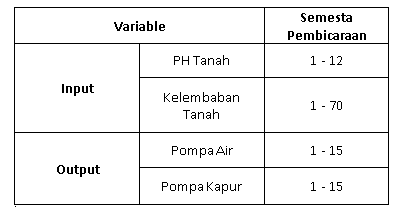

In [2]:
ph = ctrl.Antecedent(np.arange(1, 13), 'Ph Tanah')
kelembapan = ctrl.Antecedent(np.arange(1, 71), 'Kelembapan Tanah')
pompa_air = ctrl.Consequent(np.arange(1, 16), 'Pompa Air')
pompa_kapur = ctrl.Consequent(np.arange(1, 16), 'Pompa Kapur')

### Penjelasan Code
Pada modules **skfuzzy** yaitu class **Control** memiliki fungsi **Antecendent**, Yang bisa menghimpun variable **Input**, dan **Consequent** , Untuk menghimpun variable **Output**. Himpunan ini disimpan dalam Numpy Array dengan fungsi **arange(Start,Stop,Step)**.

## 1.2 Menentukan Domain Himpunan Fuzzy

Penentuan Himpunan fuzzy dilakukan dengan membagi variable menjadi 2 atribut yaitu : 
- Lingustik, Penamaan pada himpunan yang mewakili suatu kondisi dengan bahasa manusia
- Numerik, Nilai yang merepresentasikan ukuran suatu keadaan.

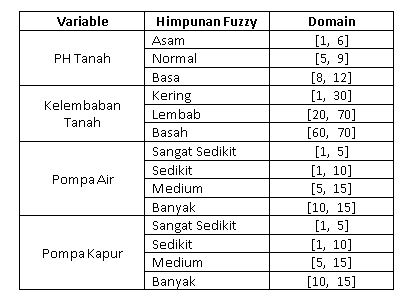

## 1.2.1 Penentuan Fungsi Keanggotaan

  Penentuan Membership function dilakukan dengan memetakan titik input data kedalam nilai keanggotaan. Untuk mendapatkan nilai keanggotaan ini dapat dilakukan dengan pendekatan fungsi matematika seperti **Representasi Linear, Segitiga, Segitiga SIku, Trapesium dll**.

Dalam Kendali PH dan Kelembaban tanah ini ,Membership function di representasikan dengan `Segitiga Siku`
![

## Penjelasan Kode


### a. Fungsi Keanggotaan
Dalam module Skfuzzy, terdapat fungsi untuk memetakan bahasa linguistik dalam himpunan fuzzy kedalam angka. Fungsi yang dipakai adalah `fuzz.trapmf()` dan `fuzz.trimf()`.

   1. **fuzz.trapmf( universe, [ titik_awal, titik_kiri, titik_kanan, titik_akhir )   :** Digunakan untuk merepresentasikan fungsi keanggotaan dengan kurva trapesium. Fungsi ini memiliki parameter `universe` dan menerima `4 titik` untuk membentuk domain trapesium.
   2. **fuzz.trimf( universe, [ titik_awal, titik_tengah, titik_akhir )               :** Berfungsi untuk menggambarkan fungsi keanggotaan dengan kurva segitiga siku. Fungsi ini memiliki parameter `universe` dan menerima `3 titik` untuk membentuk domain segitiga siku.
   
### b. Menampilkan Grafik
Untuk menampilkan grafik dari fungsi keanggotaan , dapat digunakan fungsi `view()`. Untuk mengubah judul atau nama dari y maupun x axis, dapat digunakan module matplotlib. 

#### Fungsi keanggotaan Ph Tanah

In [3]:
ph["asam"] = fuzz.trapmf(ph.universe,[1,1,5,6])
ph['normal'] = fuzz.trapmf(ph.universe,[5,6,8,9])
ph['basa'] = fuzz.trapmf(ph.universe,[8,9,12,12])

Fungsi keanggotaan Ph tanah direpresentasikan dengan kurva trapesium.

                                            Persamaan Fungsi keanggotaan Ph Tanah

$$\normalsize
 \mu asam\left[x\right]=
  \begin{cases}0  &; x \geq 6\\
  (6-x)  & ; 5<x < 6\\
  1  &; x \leq 5
  \end{cases} 
$$

.
.
$$\normalsize 
 \mu normal\left[x\right]= 
  \begin{cases}0  &; \text{$x\leq 5$ atau $x\geq 9$}\\
  (x-5) &; 5<x <6\\
  (9-x) &; 8<x <9\\
  1  &; x \geq 9
  \end{cases} $$
.
.
$$\normalsize 
 \mu basa\left[x\right]= 
  \begin{cases}0  &; x \leq 8\\
  (x-8) &; 8<x <9\\
  1  &; x \geq 9
  \end{cases} $$

**Grafik Ph Asam**

Text(0.5, 1.0, 'Fungsi Keanggotaan Ph Tanah')

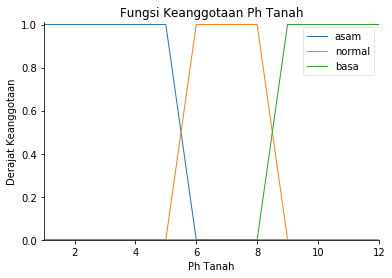

In [17]:
ph.view()
plt.ylabel('Derajat Keanggotaan')
plt.title("Fungsi Keanggotaan Ph Tanah")

In [5]:
kelembapan["kering"] = fuzz.trapmf(kelembapan.universe,[1,1,20,30])
kelembapan["lembab"] = fuzz.trapmf(kelembapan.universe,[20,30,60,70])
kelembapan["basah"] = fuzz.trimf(kelembapan.universe,[60,70,70])

Fungsi keanggotaan `kelembapan tanah` direpresentasikan dengan `kurva trapesium`.

                                            Persamaan Fungsi keanggotaan Kelembapan Tanah

$$\normalsize
 \mu kering\left[x\right]=
  \begin{cases}1  &; x \leq 20\\
  \large \text{$30 - x$} \over {10} & ; 20<x < 30\\
  0  &; x \geq 30
  \end{cases} 
$$

.
.
$$\normalsize 
 \mu lembab\left[x\right]= 
  \begin{cases}0  &; \text{$x\leq 20$ atau $x\geq 70$}\\
  \large (x-20) \over {10} &; 20<x <30\\
  \large (70-x) \over {10}&; 60<x <70\\
  1  &; \text{$ 30 \leq x \leq 60$}
  \end{cases} $$
.
.
$$\normalsize 
 \mu basah\left[x\right]= 
  \begin{cases}0  &; x \leq 60\\
  \large (x-60) \over{10}&; 60<x <70\\
  1  &; x \geq 70
  \end{cases} $$

Text(0.5, 1.0, 'Fungsi Keanggotaan Kelembapan Tanah')

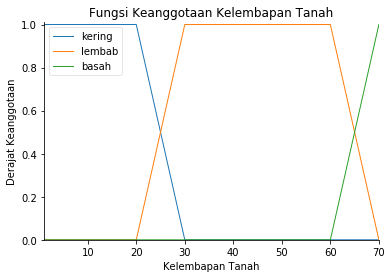

In [6]:
kelembapan.view()
plt.ylabel('Derajat Keanggotaan')
plt.title("Fungsi Keanggotaan Kelembapan Tanah")

In [7]:
pompa_air["sangat sedikit"] = fuzz.trimf(pompa_air.universe,[1,1,5])
pompa_air["sedikit"] = fuzz.trimf(pompa_air.universe,[1,5,10])
pompa_air["sedang"] = fuzz.trimf(pompa_air.universe,[5,10,15])
pompa_air["banyak"] = fuzz.trimf(pompa_air.universe,[10,15,15])

Fungsi keanggotaan `pompa air` direpresentasikan dengan `kurva segitiga siku`.

                                            Persamaan Fungsi keanggotaan Pompa Air
$$\normalsize
 \mu SangatSedikit\left[x\right]=
  \begin{cases}1  &; x \leq 1\\
  \large \text{$(5 - x)$} \over {4} & ; 1<x < 5\\
  0  &; x \geq 5
  \end{cases} 
$$

.
.
$$\normalsize 
 \mu Sedikit\left[x\right]= 
  \begin{cases}0  &; \text{$x\leq 1$ atau $x\geq 10$}\\
  \large (x-1) \over {4} &; \text{$1<x \leq 5$}\\
  \large (10-x) \over {5}&; 5<x <10
  \end{cases} $$
.
.
$$\normalsize 
 \mu Sedang\left[x\right]= 
  \begin{cases}0  &; \text{$x\leq 5$ atau $x\geq 15$}\\
  \large (x-5) \over {5} &; \text{$5<x \leq 10$}\\
  \large (15-x) \over {5}&; 10<x <15
  \end{cases} $$
.
.
$$\normalsize 
 \mu Banyak\left[x\right]= 
  \begin{cases}0  &; x \leq 10\\
  \large (x-10) \over{5}&; 10<x <15\\
  1  &; x \geq 15
  \end{cases} $$

Text(0.5, 1.0, 'Fungsi Keanggotaan Pompa Air')

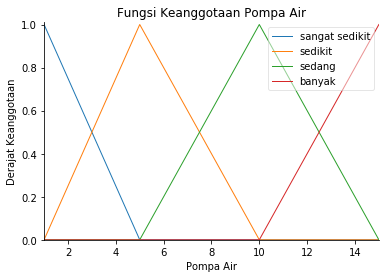

In [8]:
pompa_air.view()
plt.ylabel('Derajat Keanggotaan')
plt.title("Fungsi Keanggotaan Pompa Air")

In [9]:
pompa_kapur["sangat sedikit"] = fuzz.trimf(pompa_kapur.universe,[1,1,5])
pompa_kapur["sedikit"] = fuzz.trimf(pompa_kapur.universe,[1,5,10])
pompa_kapur["sedang"] = fuzz.trimf(pompa_kapur.universe,[5,10,15])
pompa_kapur["banyak"] = fuzz.trimf(pompa_kapur.universe,[10,15,15])

Fungsi keanggotaan `pompa kapur` direpresentasikan dengan `kurva segitiga siku`.

                                            Persamaan Fungsi keanggotaan Pompa Kapur
$$\normalsize
 \mu SangatSedikit\left[x\right]=
  \begin{cases}1  &; x \leq 1\\
  \large \text{$(5 - x)$} \over {4} & ; 1<x < 5\\
  0  &; x \geq 5
  \end{cases} 
$$

.
.
$$\normalsize 
 \mu Sedikit\left[x\right]= 
  \begin{cases}0  &; \text{$x\leq 1$ atau $x\geq 10$}\\
  \large (x-1) \over {4} &; \text{$1<x \leq 5$}\\
  \large (10-x) \over {5}&; 5<x <10
  \end{cases} $$
.
.
$$\normalsize 
 \mu Sedang\left[x\right]= 
  \begin{cases}0  &; \text{$x\leq 5$ atau $x\geq 15$}\\
  \large (x-5) \over {5} &; \text{$5<x \leq 10$}\\
  \large (15-x) \over {5}&; 10<x <15
  \end{cases} $$
.
.
$$\normalsize 
 \mu Banyak\left[x\right]= 
  \begin{cases}0  &; x \leq 10\\
  \large (x-10) \over{5}&; 10<x <15\\
  1  &; x \geq 15
  \end{cases} $$

Text(0.5, 1.0, 'Fungsi Keanggotaan Pompa Kapur')

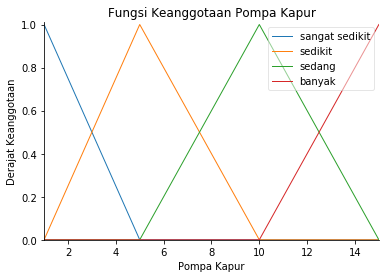

In [10]:
pompa_kapur.view()
plt.ylabel('Derajat Keanggotaan')
plt.title("Fungsi Keanggotaan Pompa Kapur")

# 2. Penentuan Aturan Fuzzy
**Basis Aturan Kendali Fuzzy**
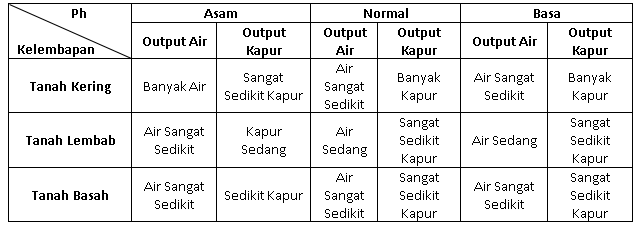

In [11]:
rule1 = ctrl.Rule(ph['asam'] & kelembapan['kering'], (pompa_kapur['banyak'], pompa_air['sangat sedikit']))
rule2 = ctrl.Rule(ph['asam']& kelembapan['lembab'], (pompa_kapur["sedang"],pompa_air['sangat sedikit']))
rule3 = ctrl.Rule(ph['asam'] & kelembapan['basah'], (pompa_kapur['sedikit'],pompa_air['sangat sedikit']))
rule4 = ctrl.Rule(ph['normal'] & kelembapan['kering'], (pompa_air['banyak'],pompa_kapur['sangat sedikit']))
rule5 = ctrl.Rule(ph['normal']& kelembapan['lembab'], (pompa_air["sedang"],pompa_kapur['sangat sedikit']))
rule6 = ctrl.Rule(ph['normal'] & kelembapan['basah'], (pompa_air['sangat sedikit'],pompa_kapur['sangat sedikit']))
rule7 = ctrl.Rule(ph['basa'] & kelembapan['kering'], (pompa_air['banyak'],pompa_kapur['sangat sedikit']))
rule8 = ctrl.Rule(ph['basa']& kelembapan['lembab'], (pompa_air["sedang"],pompa_kapur['sangat sedikit']))
rule9 = ctrl.Rule(ph['basa'] & kelembapan['basah'], (pompa_air['sangat sedikit'],pompa_kapur['sangat sedikit']))

# 3. Mekanisme Inferensi

## 3.1 Fungsi Implikasi pada Aturan Fuzzy
Pada metode `Mamdani` , Fungsi implikasi yang diimplementasikan pada aturan fuzzy adalah `MIN`.

## 3.2 Aggregat Aturan Fuzzy
Pada `Mamdani` , Penggabungan semua aturan yang aktif dilakukan dengan fungsi `MAX` pada setiap output yang mempunyai kondisi yang sama.


In [12]:
kendali_pompa = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [13]:
pompa = ctrl.ControlSystemSimulation(kendali_pompa)

## Penjelasan Code

1. **ControlSystem( [list_rule] )** 
        Fungsi ini akan secara otomatis mengimplikasi rule dan menggabungkan semua nilai rule.
2. **ControlSystemSimulation( ControlSystem )**
        Fungsi ini mensimulasi sistem kontrol sesuai dengan gabungan rule yang diberikan oleh ControlSystem.
3. **input['Variable_Input']**
        Fungsi input akan memberikan nilai kepada variable input untuk disimulasikan pada ControlSystem.

In [14]:
pompa.input['Ph Tanah'] = 5
pompa.input['Kelembapan Tanah'] = 25

# 4. Defuzzifikasi

Tahap ini akan menerjemahkan nilai fuzzy menjadi nilai crisp sebagai hasil akhir. Pada `Metode Mamdani` terdapat 5 metode yang dapat digunakan yaitu :

    a.	Metode Centroid
    b.	Metode Bisektor
    c.	Metode Mean of Maximum
    d.	Metode Largest of Maximum
    e.	Metode Smallest of Maximum
    
Dalam sistem kendali Ph melalui pompa air dan kapur ini, metode defuzzifikasi yang digunakan adalah **Metode Centroid**.
Metode ini bekerja dengan mencari *Center Of Gravity* dari hasil aggregat aturan fuzzy.

    Rumus dari Centroid adalah : 
$$ \large Centroid = \frac{\sum_{i}^{n}XiAi}{\sum_{i}^{n}Ai} $$

In [15]:
pompa.compute()
pompa.output

OrderedDict([('Pompa Kapur', 10.595238095238097),
             ('Pompa Air', 2.555555555555556)])

## Penjelasan Code
1. **compute()** 
        Fungsi ini menghitung nilai defuzzifikasi sesuai dengan nilai aggregat yang sudah dihitung pada ControlSystem.
2. **output**
        Fungsi ini menampilkan nilai defuzzifikasi yang sudah dihitung dengan "compute()".

# Hitung Manual

## Input
    - Ph Tanah         : 5
    - Kelembapan tanah : 25
    
## A. Penentuan Derajat Keanggotaan
### 1. Ph Tanah
- **Asam**

$\normalsize
 \mu asam\left[x\right]=
  \begin{cases}0  &; x \geq 6\\
  (6-x)  & ; 5<x < 6\\
  \color{red} {\bf 1}  &\color{red}{\bf ;x \leq 5} \qquad \qquad \qquad  \text{<<<------Input "5" Masuk disini}
  \end{cases} 
$

$
\normalsize \mu asam\left[5\right]= 1 
$

### 2. Kelembapan Tanah
- **Kering**

$\normalsize
 \mu kering\left[x\right]=
  \begin{cases}1  &; x \leq 20\\
  \color{red}{\bf \text{$30 - x$} \over {10}} & \color{red}{\bf ; 20<x < 30}\qquad \qquad \qquad  \text{<<<------Input "25" Masuk disini}\\
  0  &; x \geq 30
  \end{cases} 
$

$
\normalsize \mu kering\left[5\right]= \large \frac{30-25}{10}\\
\normalsize \mu kering\left[5\right]= \large \frac{5}{10}\\
\normalsize \mu kering\left[5\right]= 0.5 
$


.
.
- **lembab**

$\normalsize 
 \mu lembab\left[x\right]= 
  \begin{cases}0  &; \text{$x\leq 20$ atau $x\geq 70$}\\
  \color{red}{\bf (x-20) \over {10}} &\color{red}{\bf ; 20<x <30}\qquad \qquad \qquad  \text{<<<------Input "25" Masuk disini}\\ 
  (70-x) \over {10}&; 60<x <70\\
  1  &; \text{$ 30 \leq x \leq 60$}
  \end{cases} 
$

$
\normalsize \mu kering\left[5\right]= \large \frac{25-20}{10}\\
\normalsize \mu kering\left[5\right]= \large \frac{5}{10}\\
\normalsize \mu kering\left[5\right]= 0.5 
$

## B. Evaluasi Rule dengan Implikasi MIN
Evaluasi rule dilakukan dengan implikasi **MIN**. Sesuai dengan input yang diberikan, **Ada 2 Rule yang Aktif**

Rule 1 : If Ph `Asam`(1) & Kelembapan `Kering`(0.5), maka Pompa Kapur `Banyak`, Pompa Air `Sangat Sedikit`
     
         min(1,0.5) = Pompa Air Sangat Sedikit(0,5)
         min(1,0.5) = Pompa Kapur Banyak(0,5)

Rule 2 : If Ph `Asam`(1) & Kelembapan `Lembab`(0.5), maka Pompa Kapur `Sedang`, Pompa Air `Sangat Sedikit`
         
         min(1,0.5) = Pompa Air Sangat Sedikit(0,5)
         min(1,0.5) = Pompa Kapur Sedang(0,5)

## Aggregasi Rule
Setelah didapatkan hasil implikasi `MIN` pada setiap Rule yang aktif. Maka setiap rule akan digabungkan untuk setiap output yang berbeda. Aggregasi Untuk Kondisi yang Sejenis memakai fungsi **MAX**

### Pompa Air
1. Pompa Air Sangat Sedikit(0,5)
2. Pompa Air Sangat Sedikit(0,5)

        Aggregasi = Pompa Air Sangat Sedikit(0,5)
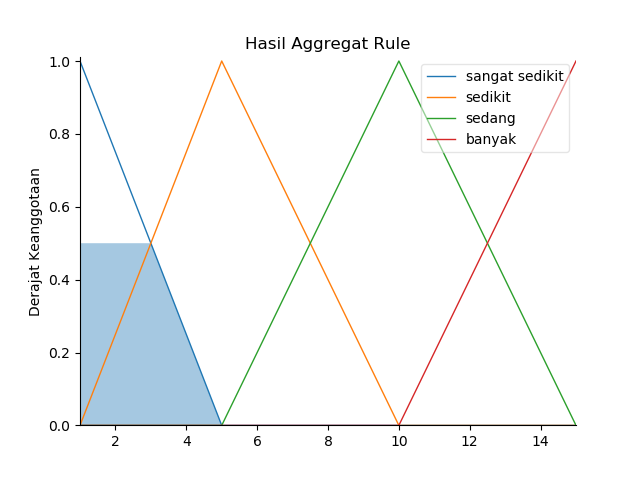


### Pompa Kapur
1. Pompa Kapur Banyak(0,5)
2. Pompa Kapur Sedang(0,5)
    
        Aggregasi = Pompa Kapur Banyak(0,5) & Pompa Kapur Sedang(0,5)
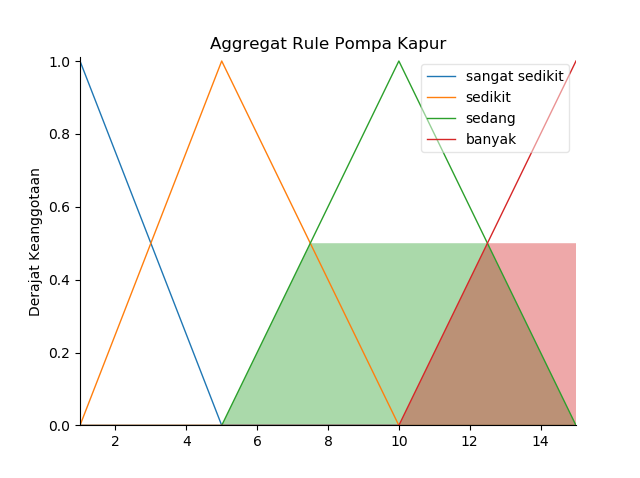

## Defuzzifikasi

### ------- Pompa Air----------
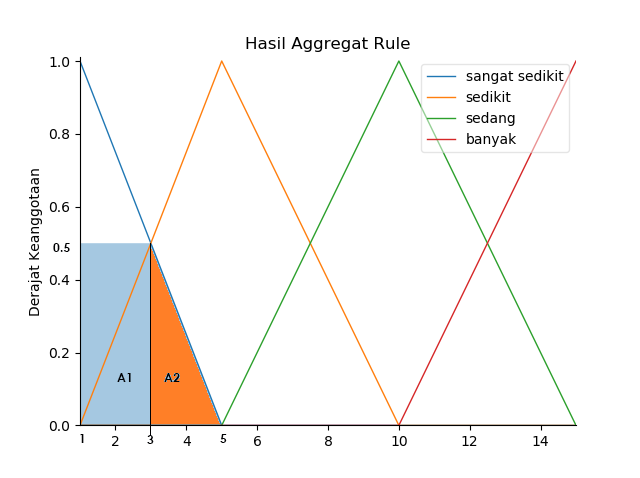
### 1. Menghitung Masing Masing nilai Xi dan Ai
### X1
$$\normalsize X1 = \frac{1}{2}*(a+b)\\
X1 = \frac{1}{2}*(3+1)\\
\color{red}{\bf X1 = 2}$$

=================================================================================================================

### X2
$$\normalsize X2 =a + \frac{1}{3}(b-a)\\
X2 = 3+ \frac{1}{3}(5-3)\\
X2 = 3 + 0.667\\
\color{red}{\bf X2 = 3.667}$$

=================================================================================================================
### A1
$$\normalsize A1 = Panjang*Lebar\\
A1 = 2 * 0.5\\
\color{red}{\bf A1 = 1}$$

=================================================================================================================
### A2
$$\normalsize A2 = \frac{1}{2}Alas*Tinggi\\
A2 = \frac{1}{2}(2*0.5)\\
\color{red}{\bf A2 = 0.5}$$

=================================================================================================================

### 2. Menghitung Hasil Defuzzifikasi
$$ Centroid\;Pompa\;Air = \frac{A1X1 + A2X2}{A1+A2}$$

$$CentroidPompaAir =  \frac{(1*2) + (0.5*3.667)}{(1+0.5)}$$

$$CentroidPompaAir =  \frac{3.8335}{1.5}$$

$$ \normalsize \bf CentroidPompaAir = 2.5567$$



### --------------Pompa Kapur----------------
### 1. Menghitung Masing Masing nilai Xi dan Ai
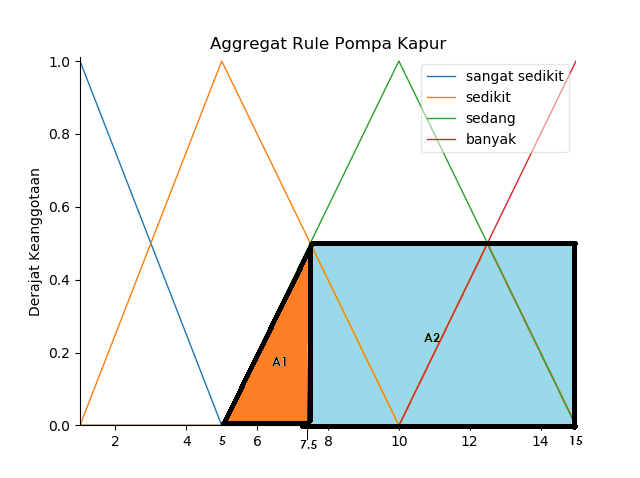
### X1
$$\normalsize X1 = a + \frac{2}{3}(b-a)\\
X1 = 3+ \frac{2}{3}(7.5-5)\\
X1 = 3 + 1.667\\
\color{red}{\bf X1 = 4.667}$$

=================================================================================================================

### X2
$$\normalsize X2 = \frac{1}{2}*(a+b)\\
X2 = \frac{1}{2}*(7.5 +15)\\
\color{red}{\bf X2 = 11,25}$$

=================================================================================================================
### A1
$$\normalsize A1 = \frac{1}{2}Alas*Tinggi\\
A1 = \frac{1}{2}(2.5*0.5)\\
\color{red}{\bf A1 = 0.625}$$

=================================================================================================================
### A2
$$\normalsize A2 = Panjang*Lebar\\
A2 = (7.5 * 0.5)\\
\color{red}{\bf A2 = 3.75}$$

### 2. Menghitung Hasil Defuzzifikasi
$$ CentroidPompaKapur = \frac{A1X1 + A2X2}{A1+A2}$$

$$CentroidPompaKapur =  \frac{(0.625*4.667) + (11.25*3.75)}{(0.625+3.75)}$$

$$CentroidPompaKapur =  \frac{45.12}{4.375}$$

$$\normalsize {\bf CentroidPompaKapur = 10.313}$$

### Grafik Hasil Defuzzifikasi untuk Pompa Air

2.555555555555556

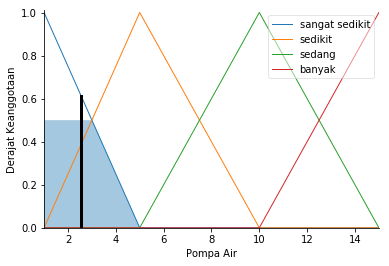

In [21]:
pompa_air.view(sim=pompa)
plt.ylabel("Derajat Keanggotaan")
pompa.output["Pompa Air"]

Untuk Output pertama yaitu **Pompa Air**, Seperti pada gambar diatas, Nilai hasil defuzzifikasi untuk **pompa air** adalah **2.55**. Sesuai dengan gambar, bisa dilihat bahwa untuk nilai **2.55** akan menghasilkan pompa air yang **sangat sedikit**.

Untuk Hasil output pertama python memiliki nilai sebesar 2,55556 detik sedangkan pada perhitungan manual memiliki nilai 2,5567 detik.
Selisih Antara hitung manual dengan program python adalah **0,0012**

### Grafik Hasil Defuzzifikasi untuk Pompa Kapur

10.595238095238097

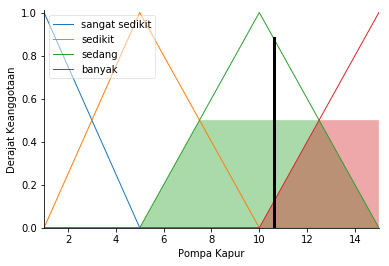

In [22]:
pompa_kapur.view(sim=pompa)
plt.ylabel("Derajat Keanggotaan")
pompa.output["Pompa Kapur"]

Untuk Output kedua yaitu **Pompa Kapur**.

Seperti pada gambar diatas, Nilai hasil defuzzifikasi untuk **pompa kapur** adalah **10.595238095238097**. Sesuai dengan gambar, bisa dilihat bahwa untuk nilai **10.6** akan menghasilkan pompa kapur yang **sedang**.

Untuk Hasil output pertama python memiliki nilai sebesar 10.595238095238097 detik sedangkan pada perhitungan manual memiliki nilai 10,313 detik.
Selisih Antara hitung manual dengan program python adalah sekitar **0,30**

# Referensi Paper

    J. Martin, E. Susanto, and S. T. M. T. P. D, “KENDALI PH DAN KELEMBABAN TANAH BERBASIS LOGIKA FUZZY MENGGUNAKAN MIKROKONTROLLER ( ARRANGEMENT PH AND HUMIDITY OF SOIL BASED ON FUZZY LOGIC USING MICROCONTROLLER ),” vol. 2, no. 2, pp. 2236–2245, 2015.